In [80]:
import re
import string

import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_columns = None

In [20]:
corpus = pd.read_json('./data/HDFC_faq.txt')
corpus.head(5)

,question,answer,found_duplicate
0,How do I change my password?,"After you have logged in, you can change your ...",False
1,When will I receive my changed ATM PIN?,You will receive your new ATM PIN by post with...,False
2,Can I get my newly generated PIN online?,"No, for security reasons we send you your ATM ...",False
3,How can I register for Autopay?,To register for Autopay: Step 1: Click on the ...,False
4,Can Chip Credit cards be used anywhere?,"Yes, your HDFC Bank Chip Credit card can be us...",False


In [21]:
corpus.shape

(2236, 3)

In [22]:
corpus= corpus[['question', 'answer']]
corpus.head(5)

,question,answer
0,How do I change my password?,"After you have logged in, you can change your ..."
1,When will I receive my changed ATM PIN?,You will receive your new ATM PIN by post with...
2,Can I get my newly generated PIN online?,"No, for security reasons we send you your ATM ..."
3,How can I register for Autopay?,To register for Autopay: Step 1: Click on the ...
4,Can Chip Credit cards be used anywhere?,"Yes, your HDFC Bank Chip Credit card can be us..."


In [23]:
corpus.shape

(2236, 2)

In [24]:
# Lets check and drop dupicate questions
corpus.drop_duplicates(subset='question', keep='first', inplace=True)
corpus.reset_index(drop=True, inplace=True)
corpus.shape

(2233, 2)

In [25]:
# lets check and drop Nans
corpus[corpus.isna().any(axis=1)]

,question,answer


In [26]:
corpus['question']

0                            How do I change my password?
1                 When will I receive my changed ATM PIN?
2                Can I get my newly generated PIN online?
3                         How can I register for Autopay?
4                 Can Chip Credit cards be used anywhere?
                              ...                        
2228    How to make payment for Insta Loan / Insta Jum...
2229    What is the disbursement time for Insta Loan /...
2230             How to check the available credit limit?
2231    What is the promo code to be entered in the lo...
2232    After loan disbursal, How to check the active ...
Name: question, Length: 2233, dtype: object

### we can seee there are some slashes which are mostly representing ***or*** , so I will go ahead and re place with 'or'

In [27]:
def clean_text1(text):
    ''' Make texts lower case, remove text in square bracket, remove punctuation'''
    text = text.lower()
    text = re.sub(r"""[\/]""", ' or ', text)
    
    # Removes quotation marks.
    text = text.replace('"', "")
    
    # Remove numeric characters.
    text = re.sub('\w*\d\w*', ' ', text)
    
    # Remove puncuation.
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    
    return text
round1 = lambda x: clean_text1(x)

In [28]:
corpus['question'] = corpus['question'].apply(round1)

In [29]:
corpus['question']

0                            how do i change my password 
1                 when will i receive my changed atm pin 
2                can i get my newly generated pin online 
3                         how can i register for autopay 
4                 can chip credit cards be used anywhere 
                              ...                        
2228    how to make payment for insta loan  or  insta ...
2229    what is the disbursement time for insta loan  ...
2230             how to check the available credit limit 
2231    what is the promo code to be entered in the lo...
2232    after loan disbursal  how to check the active ...
Name: question, Length: 2233, dtype: object

In [30]:
stemmer = SnowballStemmer('english')
lemmer = WordNetLemmatizer()


In [31]:
# Load in my data

stemmer = SnowballStemmer("english")
lemmer = WordNetLemmatizer()

STOP_WORDS = [stemmer.stem(stopword) for stopword in stopwords.words("english")]
L_STOP_WORDS = [lemmer.lemmatize(stopword) for stopword in stopwords.words("english")]

def clean_text1(text):
    ''' Make texts lower case, remove text in square bracket, remove punctuation'''
    text = text.lower()
    text = re.sub(r"""[\/]""", ' or ', text)
    
    # Removes quotation marks.
    text = text.replace('"', "")
    
    # Remove numeric characters.
    text = re.sub('\w*\d\w*', ' ', text)
    
    # Remove puncuation.
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    
    return text

def tokenizer(text):
    
    tokens = word_tokenize(text)
    tokens = [stemmer.stem(token) for token in tokens]
    return tokens


In [97]:
cv1 = CountVectorizer(
    stop_words=STOP_WORDS,
    preprocessor=clean_text1,
    tokenizer=tokenizer,
    min_df=2,
#     max_df=.80
)

document = corpus['question']
doc_term_mtx = cv1.fit_transform(document)
vocab = cv1.get_feature_names()
doc_term_df = pd.DataFrame(doc_term_mtx.toarray(), columns=vocab)
print(doc_term_df.shape)

doc_term_df

# Do your modeling here with the count vectors!

(2233, 880)


,aadhaar,abl,abroad,accept,access,accid,accident,account,acknowledg,acquir,across,action,activ,ad,add,addit,address,admiss,advanc,advantag,affect,age,agent,alert,allot,allow,along,alreadi,also,amb,amount,android,annual,annuiti,anoth,anyth,anywher,apex,apollo,app,appli,applic,appoint,approach,approv,asba,ask,assist,associ,assur,atm,author,auto,automat,autopay,avail,averag,awar,back,baggag,balanc,bank,base,basi,basic,becom,beneficiari,benefit,better,bid,bill,biller,billpay,blackberri,block,bond,bone,bonus,book,booklet,borrow,bought,branch,break,broker,browser,bsbda,burglari,busi,buy,calcul,call,cancel,cancer,capit,car,card,cardhold,care,carri,case,cash,categori,cdf,central,certain,certif,challan,chang,channel,charg,check,chequ,chhattisgarh,child,children,chip,choos,citi,citizen,claim,classic,clear,client,close,closur,club,cng,co,code,collater,collect,colleg,combin,come,commerci,compani,compat,compens,complet,compliant,compulsorili,comput,concern,condit,conduct,confirm,connect,consid,construct,contact,contactless,contain,continu,contribut,convers,convert,corpor,correspond,could,countri,cours,cover,creation,credila,credit,criteria,criterion,critic,cst,cum,currenc,current,cust,custom,cyber,daili,damag,data,date,day,dcc,de,deactiv,death,debit,decid,decis,declar,deduct,default,defenc,delay,delet,deliv,deliveri,demand,demat,demateri,dematerialis,depart,deposit,depositori,detail,devic,dhan,dialysi,differ,digit,direct,directpay,disburs,disconnect,discount,diseas,dispens,disput,dividend,doc,document,domest,done,dont,dormant,doubt,download,dp,draft,dream,dth,due,duplic,durat,duti,dvat,e,earlier,earn,easi,easyshop,ebrok,ec,ecommerc,educ,eefc,effici,eft,egiftplus,electron,elig,els,email,emerg,emi,employ,enabl,enhanc,enjoy,enrol,ensur,enter,entir,entitl,entri,equiti,ergo,error,etc,even,everi,exam,exchang,excis,exclus,execut,exempt,exist,expens,expir,expiri,extend,extens,extra,facil,fail,famili,farmer,favorit,favour,fcra,fd,featur,fee,file,fill,financ,financi,find,fir,firm,first,fix,flexi,fmc,follow,foodplus,foreclos,foreign,forexplus,forget,forgotten,form,fp,frame,fraudul,free,frequenc,fuel,fund,gcas,general,generat,get,giftplus,give,given,global,go,gold,good,got,govt,gprs,greater,green,growth,gst,guarante,guarantor,gujarat,gvat,hajj,handset,happen,hardwar,hdfc,health,held,help,higher,hindi,histori,hold,holder,holiday,home,hospit,hospitalis,hotlist,hous,howev,id,identif,ifsc,ill,im,imperia,improv,inact,includ,incom,incur,india,indian,individu,inform,initi,injuri,input,insta,instaalert,instal,institut,instruct,insuffici,insur,interest,intern,internet,intim,invest,investor,investtrack,involv,io,ipad,ipin,ipo,isic,isin,isnt,issu,ive,ivr,jan,jetprivileg,joint,jpmile,jumbo,keep,key,kid,kind,know,kyc,lac,lakh,lap,larr,last,launder,letter,levi,liabil,liabl,life,like,limit,line,link,liquid,list,load,loan,locat,lock,locker,log,login,long,lose,loss,lost,loung,machin,made,magnet,mail,maintain,major,make,manag,mandat,mandatori,mani,mantri,margin,mark,market,mastercard,matur,max,maximum,mcc,mean,meant,measur,medic,member,membership,memori,merchant,messag,mf,micr,min,minimum,minor,misplac,miss,misus,mitr,mobil,mobilebank,mode,modifi,money,moneyback,moneyplus,moni,month,moratorium,motor,mpassbook,msc,much,multi,multicurr,multipl,must,mutil,mutual,n,name,nation,natur,ncd,necessari,need,neft,net,netbank,netsaf,network,new,next,noc,nomin,nomine,non,norm,normal,note,nre,nri,nro,nsdl,number,oblig,obtain,odisha,offer,offic,offlin,old,one,onlin,open,oper,opt,option,order,organ,origin,os,otp,outlet,outsid,outstat,overdraft,oversea,page,paid,pan,parent,part,parti,partial,particip,particular,partnership,pass,passport,password,pattern,pay,payment,payout,payzapp,pension,per,perform,period,permiss,person,petrol,phone,phonebank,photo,physic,pin,pis,place,plan,platinum,pledg,plot,plus,pmjdi,point,polici,pone,pop,portabl,portal,portfolio,pos,possibl,post,ppf,pradhan,pre,prefer,prematur,premium,prepaid,prepay,present,previous,princip,prior,prioriti,privileg,pro,procedur,pr

In [47]:
tfidf1 = TfidfVectorizer(
    stop_words=STOP_WORDS,
    preprocessor=clean_text1,
    tokenizer=tokenizer,
    min_df=2,
#     max_df=.80
)

document = corpus['question']
doc_term_mtx1 = tfidf1.fit_transform(document)
vocab = tfidf1.get_feature_names()
doc_term_df1 = pd.DataFrame(doc_term_mtx1.toarray(), columns=vocab)
print(doc_term_df.shape)

doc_term_df


(2233, 880)


,aadhaar,abl,abroad,accept,access,accid,accident,account,acknowledg,acquir,across,action,activ,ad,add,addit,address,admiss,advanc,advantag,affect,age,agent,alert,allot,allow,along,alreadi,also,amb,amount,android,annual,annuiti,anoth,anyth,anywher,apex,apollo,app,appli,applic,appoint,approach,approv,asba,ask,assist,associ,assur,atm,author,auto,automat,autopay,avail,averag,awar,back,baggag,balanc,bank,base,basi,basic,becom,beneficiari,benefit,better,bid,bill,biller,billpay,blackberri,block,bond,bone,bonus,book,booklet,borrow,bought,branch,break,broker,browser,bsbda,burglari,busi,buy,calcul,call,cancel,cancer,capit,car,card,cardhold,care,carri,case,cash,categori,cdf,central,certain,certif,challan,chang,channel,charg,check,chequ,chhattisgarh,child,children,chip,choos,citi,citizen,claim,classic,clear,client,close,closur,club,cng,co,code,collater,collect,colleg,combin,come,commerci,compani,compat,compens,complet,compliant,compulsorili,comput,concern,condit,conduct,confirm,connect,consid,construct,contact,contactless,contain,continu,contribut,convers,convert,corpor,correspond,could,countri,cours,cover,creation,credila,credit,criteria,criterion,critic,cst,cum,currenc,current,cust,custom,cyber,daili,damag,data,date,day,dcc,de,deactiv,death,debit,decid,decis,declar,deduct,default,defenc,delay,delet,deliv,deliveri,demand,demat,demateri,dematerialis,depart,deposit,depositori,detail,devic,dhan,dialysi,differ,digit,direct,directpay,disburs,disconnect,discount,diseas,dispens,disput,dividend,doc,document,domest,done,dont,dormant,doubt,download,dp,draft,dream,dth,due,duplic,durat,duti,dvat,e,earlier,earn,easi,easyshop,ebrok,ec,ecommerc,educ,eefc,effici,eft,egiftplus,electron,elig,els,email,emerg,emi,employ,enabl,enhanc,enjoy,enrol,ensur,enter,entir,entitl,entri,equiti,ergo,error,etc,even,everi,exam,exchang,excis,exclus,execut,exempt,exist,expens,expir,expiri,extend,extens,extra,facil,fail,famili,farmer,favorit,favour,fcra,fd,featur,fee,file,fill,financ,financi,find,fir,firm,first,fix,flexi,fmc,follow,foodplus,foreclos,foreign,forexplus,forget,forgotten,form,fp,frame,fraudul,free,frequenc,fuel,fund,gcas,general,generat,get,giftplus,give,given,global,go,gold,good,got,govt,gprs,greater,green,growth,gst,guarante,guarantor,gujarat,gvat,hajj,handset,happen,hardwar,hdfc,health,held,help,higher,hindi,histori,hold,holder,holiday,home,hospit,hospitalis,hotlist,hous,howev,id,identif,ifsc,ill,im,imperia,improv,inact,includ,incom,incur,india,indian,individu,inform,initi,injuri,input,insta,instaalert,instal,institut,instruct,insuffici,insur,interest,intern,internet,intim,invest,investor,investtrack,involv,io,ipad,ipin,ipo,isic,isin,isnt,issu,ive,ivr,jan,jetprivileg,joint,jpmile,jumbo,keep,key,kid,kind,know,kyc,lac,lakh,lap,larr,last,launder,letter,levi,liabil,liabl,life,like,limit,line,link,liquid,list,load,loan,locat,lock,locker,log,login,long,lose,loss,lost,loung,machin,made,magnet,mail,maintain,major,make,manag,mandat,mandatori,mani,mantri,margin,mark,market,mastercard,matur,max,maximum,mcc,mean,meant,measur,medic,member,membership,memori,merchant,messag,mf,micr,min,minimum,minor,misplac,miss,misus,mitr,mobil,mobilebank,mode,modifi,money,moneyback,moneyplus,moni,month,moratorium,motor,mpassbook,msc,much,multi,multicurr,multipl,must,mutil,mutual,n,name,nation,natur,ncd,necessari,need,neft,net,netbank,netsaf,network,new,next,noc,nomin,nomine,non,norm,normal,note,nre,nri,nro,nsdl,number,oblig,obtain,odisha,offer,offic,offlin,old,one,onlin,open,oper,opt,option,order,organ,origin,os,otp,outlet,outsid,outstat,overdraft,oversea,page,paid,pan,parent,part,parti,partial,particip,particular,partnership,pass,passport,password,pattern,pay,payment,payout,payzapp,pension,per,perform,period,permiss,person,petrol,phone,phonebank,photo,physic,pin,pis,place,plan,platinum,pledg,plot,plus,pmjdi,point,polici,pone,pop,portabl,portal,portfolio,pos,possibl,post,ppf,pradhan,pre,prefer,prematur,premium,prepaid,prepay,present,previous,princip,prior,prioriti,privileg,pro,procedur,pr

## Dimensionality reduction and Topic modeling
1. #### CountVectorizer()

In [106]:
from sklearn.decomposition import TruncatedSVD, NMF, PCA
from numpy.linalg import svd
from optht import optht

* ##### Truncated SVD

In [117]:
tsvd = TruncatedSVD(879)
X_svd= tsvd.fit_transform(doc_term_mtx)

In [118]:
tsvd.explained_variance_ratio_.sum()

1.0000000000000002

In [121]:
def show_variance_explained_plots(algo):
    
    var_exp_array = algo.explained_variance_ratio_
    n_comps = var_exp_array.shape[0] 
    
    fig, ax = plt.subplots(1,2,figsize=(10,6))
    
    ax[0].fill_between(range(n_comps), var_exp_array)
    ax[0].set_title('Variance Explained by Nth Component')
    
    ax[1].fill_between(range(n_comps), np.cumsum(var_exp_array))
    ax[1].set_title('Cumulative Variance Explained by N Components')
    
    plt.savefig('./pca.jpg', dpi=100)
    
    plt.show()


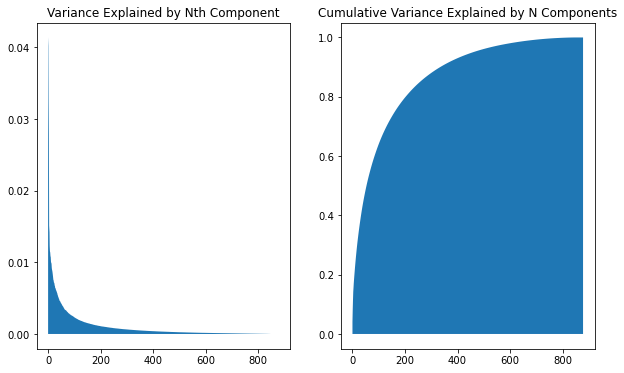

In [122]:
show_variance_explained_plots(tsvd)

* #### Above will give us an idea on how many components/ topics we can reduce our dimensions to 

In [119]:
pca = PCA(87)
X_pca= pca.fit_transform(doc_term_mtx.toarray())

In [115]:
pca.explained_variance_ratio_.sum()

0.7569734112114813

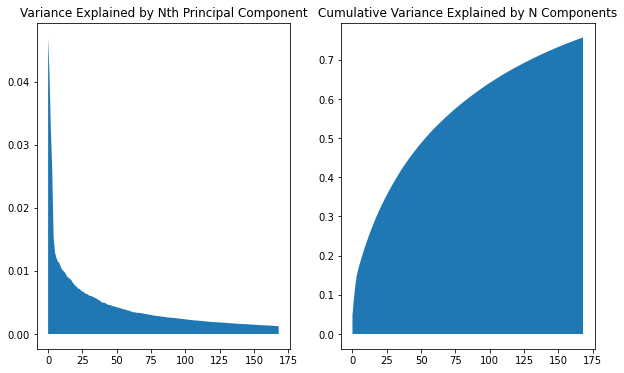

In [116]:
show_variance_explained_plots(pca)

In [100]:
u,s,vt = svd(doc_term_mtx.toarray(), full_matrices=False)
u.shape, s.shape, vt.shape

((2233, 880), (880,), (880, 880))

In [101]:
k = optht(doc_term_mtx1.toarray(), sv=s, sigma=None)
k

169